<a href="https://colab.research.google.com/github/rcrcarissa/CSE5522/blob/main/CSE5522_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Classifier Comparison**
1.0: Set up the environment.

In [ ]:
import numpy as np

# classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# datasets
from sklearn.datasets import load_iris
from sklearn.datasets import load_digits

# training & test split
from sklearn.model_selection import train_test_split

# metrics
from sklearn.metrics import accuracy_score
# from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# plot
import matplotlib.pyplot as plt

1.1: Behavior of decision trees (DT), perceptrons, and multilayer perceptrons on Iris datasets.
* MLP performs better than perceptron on training dataset, especially for classes 1 and 2. In Iris dataset, class 0 is linearly separable from other two classes, but classes 1 and 2 are not linearly separable. Thus, perceptron does not fit this dataset as well as MLP does.
* If we limit the max depth of DT, then the leaves could be impure and the model fails to achieve good performance. Without limit on max depth, its accuracy rate on training set can achieve 100% on this dataset.

In [ ]:
# classifiers for Iris dataset
clf_names = ['Decision Tree with Depth Limit', 'Decision Tree without Depth Limit', 'Perceptron', 'Multilayer Perceptron']
clf_iris = [DecisionTreeClassifier(max_depth=3),
            DecisionTreeClassifier(),
            Perceptron(),
            MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1000)]  # lbfgs solver for small dataset (150 samples)

# load datasets
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# training
for i, clf in enumerate(clf_iris):
  clf.fit(X_train, y_train)
  pre_y_train = clf.predict(X_train)
  pre_y_test = clf.predict(X_test)
  print("*************************************************************************")
  print("********** Metrics for " + clf_names[i] + " on Iris dataset **********")
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))
  # print("confusion matrix for training set:")
  # print(confusion_matrix(pre_y_train, y_train))
  # print("confusion matrix for test set:")
  # print(confusion_matrix(pre_y_test, y_test))
  print("classification report for training set:")
  print(classification_report(pre_y_train, y_train))

*************************************************************************
********** Metrics for Decision Tree with Depth Limit on Iris dataset **********
accuracy score for training set: 0.9666666666666667
accuracy score for test set: 0.9666666666666667
classification report for training set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.95      0.95      0.95        37
           2       0.95      0.95      0.95        44

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120

*************************************************************************
********** Metrics for Decision Tree without Depth Limit on Iris dataset **********
accuracy score for training set: 1.0
accuracy score for test set: 1.0
classification report for training set:
              precision    recall  f1-score   support

 

1.2: Compare the behavior of DT, perceptrons, and multilayer perceptrons on Digits dataset.
* Decision tree with limitation on max depth performs worst.
* Decision tree without limitation on max depth easily suffers from overfitting issues. The accuracy score of it on training dataset is the highest but that on test dataset is the lowest, compared with perceptron and MLP. It tends to mispredict samples from other classes as class 3 (recall=0.70), and miss samples in class 8 (precision=0.64).
* MLP performs better than perceptron, which means Digits dataset is not linearly separable.

In [ ]:
# classifiers for Digits dataset
clf_names = ['Decision Tree with Depth Limit', 'Decision Tree without Depth Limit', 'Perceptron', 'Multilayer Perceptron']
clf_digits = [DecisionTreeClassifier(max_depth=3),
              DecisionTreeClassifier(),
              Perceptron(),
              MLPClassifier(solver='adam', hidden_layer_sizes=(10, 10), max_iter=1000)]  # adam solver for large dataset (1797 samples)

# load datasets
X, y = load_digits(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# training
for i, clf in enumerate(clf_digits):
  clf.fit(X_train, y_train)
  pre_y_train = clf.predict(X_train)
  pre_y_test = clf.predict(X_test)
  print("*************************************************************************")
  print("********** Metrics for " + clf_names[i] + " on Digits dataset **********")
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))
  # print("confusion matrix for training set:")
  # print(confusion_matrix(pre_y_train, y_train))
  # print("confusion matrix for test set:")
  # print(confusion_matrix(pre_y_test, y_test))
  print("classification report for test set:")
  print(classification_report(pre_y_test, y_test, zero_division=0))

*************************************************************************
********** Metrics for Decision Tree with Depth Limit on Digits dataset **********
accuracy score for training set: 0.4906054279749478
accuracy score for test set: 0.425
classification report for test set:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88        25
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.97      0.26      0.41       109
           4       0.80      0.26      0.39        93
           5       0.10      0.57      0.17         7
           6       0.80      0.49      0.60        72
           7       0.72      0.70      0.71        40
           8       0.00      0.00      0.00         0
           9       0.27      0.79      0.40        14

    accuracy                           0.42       360
   macro avg       0.45      0.40      0.36       360
weighted avg    

1.3: Behavior of DT (no limit on max depth), perceptrons, and multilayer perceptrons on self-generated 2D datasets.
* DT performs good since there is no outlier in this dataset.
* Performance of perceptrons and MLP are comparable since this is a linearly separable problem. However, MLP has much more parameters to train and thus is more time- and memory-consuming and more likely to affected by overfitting.

*************************************************************************
********** Metrics for Decision Tree on generated dataset **********
accuracy score for training set: 1.0
accuracy score for test set: 0.97
classification report for test set:
              precision    recall  f1-score   support

          -1       0.95      0.99      0.97       104
           1       0.99      0.95      0.97        96

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200

*************************************************************************
********** Metrics for Perceptron on generated dataset **********
accuracy score for training set: 0.99125
accuracy score for test set: 0.99
classification report for test set:
              precision    recall  f1-score   support

          -1       1.00      0.98      0.99       110
           1       0.98      1.00      0.99        90

    accu

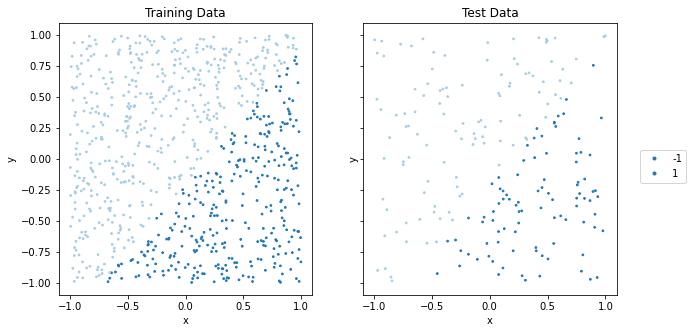

In [ ]:
# classifiers for generated dataset
clf_names = ['Decision Tree', 'Perceptron', 'Multilayer Perceptron']
clf_gen = [DecisionTreeClassifier(),
            Perceptron(),
            MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1000)]  # lbfgs solver for medium dataset (1000 samples)

# load datasets
X = np.random.uniform(-1, 1, [1000, 2])
y = [(-1) ** (1.1 * x[0] <= x[1] + 0.2) for x in X]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# plot datasets
cmap = {-1: '#a6cee3', 1: '#1f78b4'}
cmap_train = [cmap[i] for i in y_train]
cmap_test = [cmap[i] for i in y_test]
plt.cla()
fig, (train_plot, test_plot) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
train_plot.scatter(X_train.T[0], X_train.T[1], s=3, c=cmap_train)
train_plot.set_title('Training Data')
train_plot.set(xlabel='x', ylabel='y')
test_plot.scatter(X_test.T[0], X_test.T[1], s=3, c=cmap_test)
test_plot.set_title('Test Data')
test_plot.set(xlabel='x', ylabel='y')
patches = [plt.plot([],[], marker="o", ms=3, ls="", mec=None, color=colormap[i], label="{:s}".format(str(i)))[0]  for i in cmap]
fig.legend(handles=patches, loc='right')
fig.show()

# training
for i, clf in enumerate(clf_gen):
  clf.fit(X_train, y_train)
  pre_y_train = clf.predict(X_train)
  pre_y_test = clf.predict(X_test)
  print("*************************************************************************")
  print("********** Metrics for " + clf_names[i] + " on generated dataset **********")
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))
  # print("confusion matrix for training set:")
  # print(confusion_matrix(pre_y_train, y_train))
  # print("confusion matrix for test set:")
  # print(confusion_matrix(pre_y_test, y_test))
  print("classification report for test set:")
  print(classification_report(pre_y_test, y_test))

2.1: A dataset suitable for DT. The attributes in the dataset are weakly linearly correlated (sin and cos functions). The dataset has small number of outliers and is not linearly separable.  
We can see that DT performs best, and perceptron is the worst. MLP can perform better with more layers (e.g., 10 layers).

*************************************************************************
************************ Metrics for Decision Tree ************************
accuracy score for training set: 1.0
accuracy score for test set: 0.943
*************************************************************************
************************ Metrics for Perceptron ************************
accuracy score for training set: 0.49975
accuracy score for test set: 0.477
*************************************************************************
************************ Metrics for Multilayer Perceptron with 2 layers ************************
accuracy score for training set: 0.52
accuracy score for test set: 0.543
*************************************************************************
************************ Metrics for Multilayer Perceptron with 10 layers ************************
accuracy score for training set: 0.71175
accuracy score for test set: 0.677


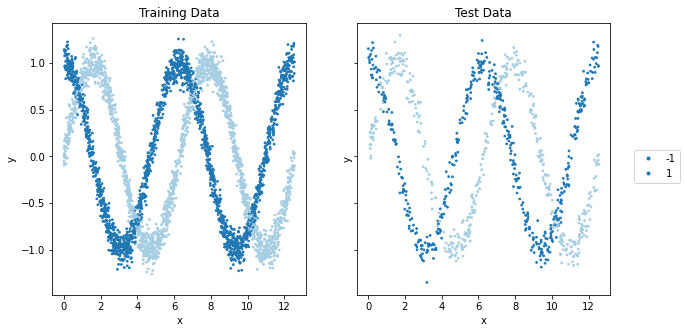

In [ ]:
# generate datasets
num_samples = 5000
std = 0.1
X = np.zeros([num_samples, 2])
X.T[0] = np.random.uniform(0, 4 * np.pi, num_samples)
y = np.append(np.ones(num_samples // 2) * (-1), np.ones(num_samples // 2))
for i in range(num_samples // 2):
  X.T[1][i] = np.random.normal(np.sin(X.T[0][i]), std)
  X.T[1][i + num_samples // 2] = np.random.normal(np.cos(X.T[0][i + num_samples // 2]), std)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# plot datasets
cmap = {-1: '#a6cee3', 1: '#1f78b4'}
cmap_train = [cmap[i] for i in y_train]
cmap_test = [cmap[i] for i in y_test]
fig, (train_plot, test_plot) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
train_plot.scatter(X_train.T[0], X_train.T[1], s=3, c=cmap_train)
train_plot.set_title('Training Data')
train_plot.set(xlabel='x', ylabel='y')
test_plot.scatter(X_test.T[0], X_test.T[1], s=3, c=cmap_test)
test_plot.set_title('Test Data')
test_plot.set(xlabel='x', ylabel='y')
patches = [plt.plot([],[], marker="o", ms=3, ls="", mec=None, color=colormap[i], label="{:s}".format(str(i)))[0]  for i in cmap]
fig.legend(handles=patches, loc='right')
fig.show()

# classifiers for generated dataset
clf_names = ['Decision Tree', 'Perceptron', 'Multilayer Perceptron with 2 layers', 'Multilayer Perceptron with 10 layers']
clf_gen = [DecisionTreeClassifier(),
            Perceptron(),
            MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 2), max_iter=1e4),
            MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1e4)]  # lbfgs solver for medium dataset (1000 samples)

# training
for i, clf in enumerate(clf_gen):
  clf.fit(X_train, y_train)
  pre_y_train = clf.predict(X_train)
  pre_y_test = clf.predict(X_test)
  print("*************************************************************************")
  print("************************ Metrics for " + clf_names[i] + " ************************")
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))
  # print("confusion matrix for training set:")
  # print(confusion_matrix(pre_y_train, y_train))
  # print("confusion matrix for test set:")
  # print(confusion_matrix(pre_y_test, y_test))
  # print("classification report for test set:")
  # print(classification_report(pre_y_test, y_test))

2.2: A dataset suitable for perceptron. The attributes in the dataset are correlated and linearly separable, but with outliers.  
We can see that both perceptron and MLP perform good, and decision tree is the worst on test dataset (overfitting).

*************************************************************************
************************ Metrics for Decision Tree ************************
accuracy score for training set: 1.0
accuracy score for test set: 0.85625
*************************************************************************
************************ Metrics for Perceptron ************************
accuracy score for training set: 0.896875
accuracy score for test set: 0.9025
*************************************************************************
************************ Metrics for Multilayer Perceptron ************************
accuracy score for training set: 0.914375
accuracy score for test set: 0.90125


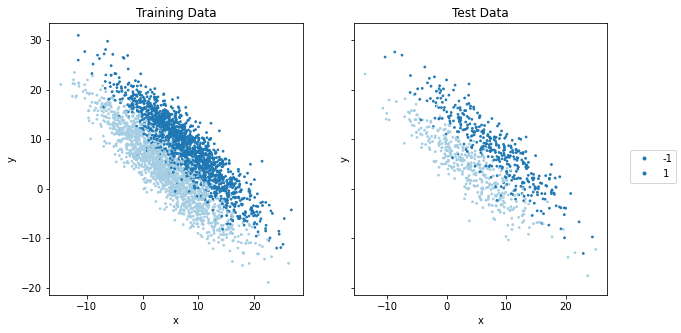

In [ ]:
# generate datasets
normal_centers = [(4, 4), (8, 8)]
labels = [-1, 1]
std_x = 6
std_y = 3
num_samples = 4000
X = np.zeros([num_samples, 2])
y = np.zeros(num_samples)
for i, center in enumerate(normal_centers):
  upper_idx = num_samples // len(normal_centers) * i
  lower_idx = num_samples // len(normal_centers) * (i + 1)
  X.T[0][upper_idx:lower_idx] = np.random.normal(center[0], std_x, num_samples // len(normal_centers))
  for j in range(num_samples // len(normal_centers)):
    X.T[1][j + upper_idx] = np.random.normal(center[0] + center[1] - X.T[0][j + upper_idx], std_y)
  y[upper_idx:lower_idx] = labels[i]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# plot datasets
cmap = {-1: '#a6cee3', 1: '#1f78b4'}
cmap_train = [cmap[i] for i in y_train]
cmap_test = [cmap[i] for i in y_test]
fig, (train_plot, test_plot) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
train_plot.scatter(X_train.T[0], X_train.T[1], s=3, c=cmap_train)
train_plot.set_title('Training Data')
train_plot.set(xlabel='x', ylabel='y')
test_plot.scatter(X_test.T[0], X_test.T[1], s=3, c=cmap_test)
test_plot.set_title('Test Data')
test_plot.set(xlabel='x', ylabel='y')
patches = [plt.plot([],[], marker="o", ms=3, ls="", mec=None, color=colormap[i], label="{:s}".format(str(i)))[0]  for i in cmap]
fig.legend(handles=patches, loc='right')
fig.show()

# classifiers for generated dataset
clf_names = ['Decision Tree', 'Perceptron', 'Multilayer Perceptron']
clf_gen = [DecisionTreeClassifier(),
            Perceptron(),
            MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 2), max_iter=1000)]  # lbfgs solver for medium dataset (1000 samples)

# training
for i, clf in enumerate(clf_gen):
  clf.fit(X_train, y_train)
  pre_y_train = clf.predict(X_train)
  pre_y_test = clf.predict(X_test)
  print("*************************************************************************")
  print("************************ Metrics for " + clf_names[i] + " ************************")
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))
  # print("confusion matrix for training set:")
  # print(confusion_matrix(pre_y_train, y_train))
  # print("confusion matrix for test set:")
  # print(confusion_matrix(pre_y_test, y_test))
  # print("classification report for test set:")
  # print(classification_report(pre_y_test, y_test))

2.3: A dataset suitable for MLP. The dataset is 6-dimensional, not linearly separable, with many outliers. The data points within and outside of a sphere have different labels.
We can see that MLP performs best. DT is the worst on test dataset (overfitting).

In [ ]:
# generate datasets
num_samples = 10000
X = np.random.uniform(-1, 1, [num_samples, 6])
y = np.ones(num_samples)
for i in range(num_samples):
  if np.sum(X[i] ** 2) < 0.4 ** 2 * 6:
    y[i] = -1
  elif np.sum(X[i] ** 2) < 0.6 ** 2 * 6:
    if np.random.rand() < 0.5:
      y[i] = -1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

# classifiers for generated dataset
clf_names = ['Decision Tree', 'Perceptron', 'Multilayer Perceptron']
clf_gen = [DecisionTreeClassifier(),
            Perceptron(),
            MLPClassifier(solver='lbfgs', hidden_layer_sizes=(10, 10), max_iter=1e4)]  # lbfgs solver for medium dataset (1000 samples)

# training
for i, clf in enumerate(clf_gen):
  clf.fit(X_train, y_train)
  pre_y_train = clf.predict(X_train)
  pre_y_test = clf.predict(X_test)
  print("*************************************************************************")
  print("************************ Metrics for " + clf_names[i] + " ************************")
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))
  # print("confusion matrix for training set:")
  # print(confusion_matrix(pre_y_train, y_train))
  # print("confusion matrix for test set:")
  # print(confusion_matrix(pre_y_test, y_test))
  # print("classification report for test set:")
  # print(classification_report(pre_y_test, y_test))

*************************************************************************
************************ Metrics for Decision Tree ************************
accuracy score for training set: 1.0
accuracy score for test set: 0.6845
*************************************************************************
************************ Metrics for Perceptron ************************
accuracy score for training set: 0.603
accuracy score for test set: 0.6055
*************************************************************************
************************ Metrics for Multilayer Perceptron ************************
accuracy score for training set: 0.753875
accuracy score for test set: 0.7455


3.1: Bonus 1: Implement the decision tree and perceptron algorithms on your own and compare performance on the above sets.  
The performance of implemented models is very similar with the models imported from sklearn.

In [ ]:
########### Decision Tree (Gini impurity) ###########
def unique_vals(rows, col):
  return set([row[col] for row in rows])

def class_counts(rows):
  counts = {}
  for row in rows:
    label = row[-1]
    if label not in counts:
      counts[label] = 0
    counts[label] += 1
  return counts

def is_numeric(value):
  return isinstance(value, int) or isinstance(value, float)

class Question:
  def __init__(self, column, value):
    self.column = column
    self.value = value

  def match(self, example):
    val = example[self.column]
    if is_numeric(val):
      return val >= self.value
    else:
      return val == self.values

def partition(rows, question):
  true_rows, false_rows = [], []
  for row in rows:
    if question.match(row):
      true_rows.append(row)
    else:
      false_rows.append(row)
  return true_rows, false_rows

def gini(rows):
  counts = class_counts(rows)
  impurity = 1
  for label in counts:
    prob_of_label = counts[label] / float(len(rows))
    impurity -= prob_of_label**2
  return impurity

def info_gain(left, right, current_uncertainty):
  p = float(len(left)) / (len(left)+len(right))
  return current_uncertainty - p*gini(left) - (1 - p)*gini(right)

def find_best_split(rows):
  best_gain = 0  
  best_question = None 
  current_uncertainty = gini(rows)
  n_features = len(rows[0]) - 1  
  for col in range(n_features):  
    values = set([row[col] for row in rows])
    for val in values:  
      question = Question(col, val)
      true_rows, false_rows = partition(rows, question)
      if len(true_rows) == 0 or len(false_rows) == 0:
        continue
      gain = info_gain(true_rows, false_rows, current_uncertainty)
      if gain >= best_gain:
        best_gain, best_question = gain, question

  return best_gain, best_question

class Leaf:
  def __init__(self, rows):
    self.predictions = class_counts(rows)

class Decision_Node:
  def __init__(self, question, true_branch, false_branch):
    self.question = question
    self.true_branch = true_branch
    self.false_branch = false_branch

def build_tree(rows):
  gain, question = find_best_split(rows)
  if gain == 0:
    return Leaf(rows)
  true_rows, false_rows = partition(rows, question)
  true_branch = build_tree(true_rows)
  false_branch = build_tree(false_rows)
  return Decision_Node(question, true_branch, false_branch)

def classify(row, node):
  if isinstance(node, Leaf):
    return node.predictions
  if node.question.match(row):
    return classify(row, node.true_branch)
  else:
    return classify(row, node.false_branch)

def DecisionTree_fit(X_train, y_train):
  training_data = np.c_[X_train, y_train]
  return build_tree(training_data)

def DecisionTree_predict(tree, X_test, y_test):
  test = np.c_[X_test, y_test]
  pre_y_test = []
  for row in test:
    pre_y_test.append(int(list(classify(row, tree).keys())[0]))
  return pre_y_test

########### Perceptron ###########

class perceptron(object):
  def __init__(self, input_size, lr=0.0001, epochs=1000):
    self.W = np.zeros(input_size+1)
    self.epochs = epochs
    self.lr = lr
    
  def activation_fn(self, x, d):
    lst = list(set(d))
    return lst[min(range(len(lst)), key = lambda i: abs(lst[i]-x))]
 
  def predict(self, x, d):
    z = self.W.T.dot(x)
    z = self.activation_fn(z, d)
    return z
    
  def predict_all(self, X, d):
    pre_y = []
    for x in X:
      x = np.insert(x, 0, 1)
      y = self.predict(x, d)
      pre_y.append(y)
    return pre_y
 
  def fit(self, X, d):
    for _ in range(self.epochs):
        for i in range(len(d)):
          x = np.insert(X[i], 0, 1)
          y = self.predict(x, d)
          e = d[i] - y
          self.W = self.W + self.lr * e * x

# a function training both of the implemented models
def run_implementation(X, y, dataset):
  print("******************* " + dataset + " *******************")
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  
  decision_tree = DecisionTree_fit(X_train, y_train)
  pre_y_train = DecisionTree_predict(decision_tree, X_train, y_train)
  pre_y_test = DecisionTree_predict(decision_tree, X_test, y_test)
  print("******************* Implemented Decision Tree *******************")
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))
  
  perceptron = perceptron(input_size=len(X[0]), dataset=dataset)
  perceptron.fit(X_train, y_train)
  pre_y_train = perceptron.predict_all(X_train, y_train)
  pre_y_test = perceptron.predict_all(X_test, y_test)
  print("******************* Implemented Perceptron *******************")
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))

  print("*********************************************************")

#################################################
# load datasets and training
X, y = load_iris(return_X_y=True)
run_implementation(X, y, "Iris dataset")

X, y = load_digits(return_X_y=True)
run_implementation(X, y, "Digits dataset")

X = np.random.uniform(-1, 1, [1000, 2])
y = [(-1) ** (1.1 * x[0] <= x[1] + 0.2) for x in X]
run_implementation(X, y, "generated dataset")

num_samples = 5000
std = 0.1
X = np.zeros([num_samples, 2])
X.T[0] = np.random.uniform(0, 4 * np.pi, num_samples)
y = np.append(np.ones(num_samples // 2) * (-1), np.ones(num_samples // 2))
for i in range(num_samples // 2):
  X.T[1][i] = np.random.normal(np.sin(X.T[0][i]), std)
  X.T[1][i + num_samples // 2] = np.random.normal(np.cos(X.T[0][i + num_samples // 2]), std)
run_implementation(X, y, "Part-2 generated dataset 1")

normal_centers = [(4, 4), (8, 8)]
labels = [-1, 1]
std_x = 6
std_y = 3
num_samples = 4000
X = np.zeros([num_samples, 2])
y = np.zeros(num_samples)
for i, center in enumerate(normal_centers):
  upper_idx = num_samples // len(normal_centers) * i
  lower_idx = num_samples // len(normal_centers) * (i + 1)
  X.T[0][upper_idx:lower_idx] = np.random.normal(center[0], std_x, num_samples // len(normal_centers))
  for j in range(num_samples // len(normal_centers)):
    X.T[1][j + upper_idx] = np.random.normal(center[0] + center[1] - X.T[0][j + upper_idx], std_y)
  y[upper_idx:lower_idx] = labels[i]
run_implementation(X, y, "Part-2 generated dataset 2")

num_samples = 10000
X = np.random.uniform(-1, 1, [num_samples, 6])
y = np.ones(num_samples)
for i in range(num_samples):
  if np.sum(X[i] ** 2) < 0.4 ** 2 * 6:
    y[i] = -1
  elif np.sum(X[i] ** 2) < 0.6 ** 2 * 6:
    if np.random.rand() < 0.5:
      y[i] = -1
run_implementation(X, y, "Part-2 generated dataset 3")

******************* Iris dataset *******************
******************* Implemented Decision Tree *******************
accuracy score for training set: 1.0
accuracy score for test set: 0.9210526315789473
******************* Implemented Perceptron *******************
accuracy score for training set: 0.9107142857142857
accuracy score for test set: 0.868421052631579
*********************************************************
******************* Digits dataset *******************
******************* Implemented Decision Tree *******************
accuracy score for training set: 1.0
accuracy score for test set: 0.8488888888888889
******************* Implemented Perceptron *******************
accuracy score for training set: 0.9532293986636972
accuracy score for test set: 0.9266666666666666
*********************************************************
******************* generated dataset *******************
******************* Implemented Decision Tree *******************
accuracy score for traini

3.2: Bonus 2: Implement random forest. Bagging mechanism is applied in voting.  
We can see random forest performs better than decision tree on all datasets. It deals with many problems on decision trees, such as noise and outliers (Part-2 generated dataset 2), high dimensionality (Part-2 generated dataset 3) and overfitting (Digits dataset). The improvement of generalization ability results from the randomness of sampling and node splitting. 

In [ ]:
########### Implemented Random Forest ###########
def bagging_predict(trees, row):
  predictions = [int(list(classify(row, tree).keys())[0]) for tree in trees]
  return max(set(predictions), key=predictions.count)  # bagging

def subsample(dataset, ratio):
  sample = list()
  n_sample = round(len(dataset) * ratio)
  while len(sample) < n_sample:
    index = randrange(len(dataset))
    sample.append(dataset[index])
  return sample

def random_forest(X_train, y_train, n_trees):
  trees = []
  for i in range(n_trees):
    tree = DecisionTree_fit(X_train, y_train)
    trees.append(tree)
  return trees

def eval_RF(X, y, n_trees, dataset):
  print("******************* " + dataset + " *******************")
  X_train, X_test, y_train, y_test = train_test_split(X, y)
  forest = random_forest(X_train, y_train, n_trees)
  pre_y_train = [bagging_predict(forest, row) for row in X_train]
  pre_y_test = [bagging_predict(forest, row) for row in X_test]
  print("accuracy score for training set:", accuracy_score(pre_y_train, y_train))
  print("accuracy score for test set:", accuracy_score(pre_y_test, y_test))

#################################################
num_trees = 100

# load datasets and training
X, y = load_iris(return_X_y=True)
eval_RF(X, y, num_trees, "Iris dataset")

X, y = load_digits(return_X_y=True)
eval_RF(X, y, num_trees, "Digits dataset")

X = np.random.uniform(-1, 1, [1000, 2])
y = [(-1) ** (1.1 * x[0] <= x[1] + 0.2) for x in X]
eval_RF(X, y, num_trees, "generated dataset")

num_samples = 5000
std = 0.1
X = np.zeros([num_samples, 2])
X.T[0] = np.random.uniform(0, 4 * np.pi, num_samples)
y = np.append(np.ones(num_samples // 2) * (-1), np.ones(num_samples // 2))
for i in range(num_samples // 2):
  X.T[1][i] = np.random.normal(np.sin(X.T[0][i]), std)
  X.T[1][i + num_samples // 2] = np.random.normal(np.cos(X.T[0][i + num_samples // 2]), std)
eval_RF(X, y, num_trees, "Part-2 generated dataset 1")

normal_centers = [(4, 4), (8, 8)]
labels = [-1, 1]
std_x = 6
std_y = 3
num_samples = 4000
X = np.zeros([num_samples, 2])
y = np.zeros(num_samples)
for i, center in enumerate(normal_centers):
  upper_idx = num_samples // len(normal_centers) * i
  lower_idx = num_samples // len(normal_centers) * (i + 1)
  X.T[0][upper_idx:lower_idx] = np.random.normal(center[0], std_x, num_samples // len(normal_centers))
  for j in range(num_samples // len(normal_centers)):
    X.T[1][j + upper_idx] = np.random.normal(center[0] + center[1] - X.T[0][j + upper_idx], std_y)
  y[upper_idx:lower_idx] = labels[i]
eval_RF(X, y, num_trees, "Part-2 generated dataset 2")

num_samples = 10000
X = np.random.uniform(-1, 1, [num_samples, 6])
y = np.ones(num_samples)
for i in range(num_samples):
  if np.sum(X[i] ** 2) < 0.4 ** 2 * 6:
    y[i] = -1
  elif np.sum(X[i] ** 2) < 0.6 ** 2 * 6:
    if np.random.rand() < 0.5:
      y[i] = -1
eval_RF(X, y, num_trees, "Part-2 generated dataset 3")

******************* Iris dataset *******************
accuracy score for training set: 1.0
accuracy score for test set: 0.9736842105263158
******************* Digits dataset *******************
accuracy score for training set: 1.0
accuracy score for test set: 0.9555555555555556
******************* generated dataset *******************
accuracy score for training set: 1.0
accuracy score for test set: 0.984
******************* Part-2 generated dataset 1 *******************
accuracy score for training set: 1.0
accuracy score for test set: 0.9616
******************* Part-2 generated dataset 2 *******************
accuracy score for training set: 1.0
accuracy score for test set: 0.899
******************* Part-2 generated dataset 3 *******************
accuracy score for training set: 1.0
accuracy score for test set: 0.734
